<a href="https://colab.research.google.com/github/chloehmiri/Supervised-Learning-Regression-Analysis-Work/blob/main/Regression_Trees_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REGRESSION TREES Practice**

Winemaking is a challenging and competitive business. There are myriad factors that impact the quality of a varietal, some of which are environmental and others having to do with the manufacturing process. As a result, the winemaking industry has invested heavily in data collection and machine learning methods that may assist in creating high quality wine. A review written by a critic often determines whether a bottle ends up on the top or bottom shelf.

We want to create a systematic way of mimicking ‘expert’ wine ratings. This could help winemakers identify key factors that contribute to better-rated wines. This system will not suffer from the subjectivity that is inherent with human tastings, such as mood and/or palate fatigue. A machine learning algorithm may result in better wine as well as a more objective, consistent, and fair ratings.

The red wine data includes values of 11 chemical properties of a large sample of red wines. For each wine, a laboratory analysis measured characteristics such as the acidity, sugar content, chloride, sulfur, alcohol, pH, density, and more. The samples were then rated in a blind tasting by panels of no less than three judges on a quality scale ranging from 0 (very bad) to 10 (excellent). In the case that judges disagreed on the rating, the median value was used. We want to be able to predict the quality of red wines based on their chemical properties when new red wines become available for judging and rating.

In [ ]:
url <- "https://raw.githubusercontent.com/jahn2178/ma322/main/redwines.csv"
redwine <- read.csv(url, stringsAsFactors=TRUE)
str(redwine)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  6.5 9.1 6.9 7.3 12.5 5.4 10.4 7.9 7.3 9.5 ...
 $ volatile.acidity    : num  0.9 0.22 0.52 0.59 0.28 0.74 0.28 0.4 0.39 0.37 ...
 $ citric.acid         : num  0 0.24 0.25 0.26 0.54 0.09 0.54 0.3 0.31 0.52 ...
 $ residual.sugar      : num  1.6 2.1 2.6 2 2.3 1.7 2.7 1.8 2.4 2 ...
 $ chlorides           : num  0.052 0.078 0.081 0.08 0.082 0.089 0.105 0.157 0.074 0.088 ...
 $ free.sulfur.dioxide : num  9 1 10 17 12 16 5 2 9 12 ...
 $ total.sulfur.dioxide: num  17 28 37 104 29 26 19 45 46 51 ...
 $ density             : num  0.995 0.999 0.997 0.996 1 ...
 $ pH                  : num  3.5 3.41 3.46 3.28 3.11 3.67 3.25 3.31 3.41 3.29 ...
 $ sulphates           : num  0.63 0.87 0.5 0.52 1.36 0.56 0.63 0.91 0.54 0.58 ...
 $ alcohol             : num  10.9 10.3 11 9.9 9.8 11.6 9.5 9.5 9.4 11.1 ...
 $ quality             : int  6 6 5 5 7 6 5 6 6 6 ...


**Question1**: Which feature is your target and what type of feature is it?

**Answer**: 'quality' is my target feature representing numerical feature

**Question2**: How many examples do we have in this data set? What does each example represent here?

**Answer**: 1599 examples in this data set and all of examples are representing some components for creating high quality wine

**Question3**: What is the mean and variance of our target feature?

In [ ]:
mean(redwine$quality)
var(redwine$quality)

[1] 5.636023

[1] 0.6521684

**Question4**: Let’s split the data into a Training set and Test set.

(1) First, you should randomize, i.e. shuffle the examples in the data set. To do this, set seed to 123 just before you specify runif() to get the same results as professor.

In [ ]:
set.seed(123)
grp <- runif(nrow(redwine))

redwine2 <- redwine[order(grp), ]

(2) Once you have done this proceed to split the data into Training and Test sets. Take the first 1300 examples for Training and the rest for Testing. Create 2 assigned objects here:

In [ ]:
redwine_train <- redwine[1:1300, ]
redwine_test <- redwine[1301:1599, ]

**Question5**: What is the mean of the target feature in the Training and in Test data set?

(Note: If the examples were shuffled well the means should be close to each other.)

In [ ]:
mean(redwine_train$quality)
mean(redwine_test$quality)

[1] 5.642308

[1] 5.608696

**Question6**: With the Training and Test sets successfully split, you can now use the rpart algorithm to create a regression tree model.

In [ ]:
install.packages("rpart")
install.packages("rpart.plot")
library(rpart) # load necessary packages to run RT and plot it
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Question6(1)**: Define model

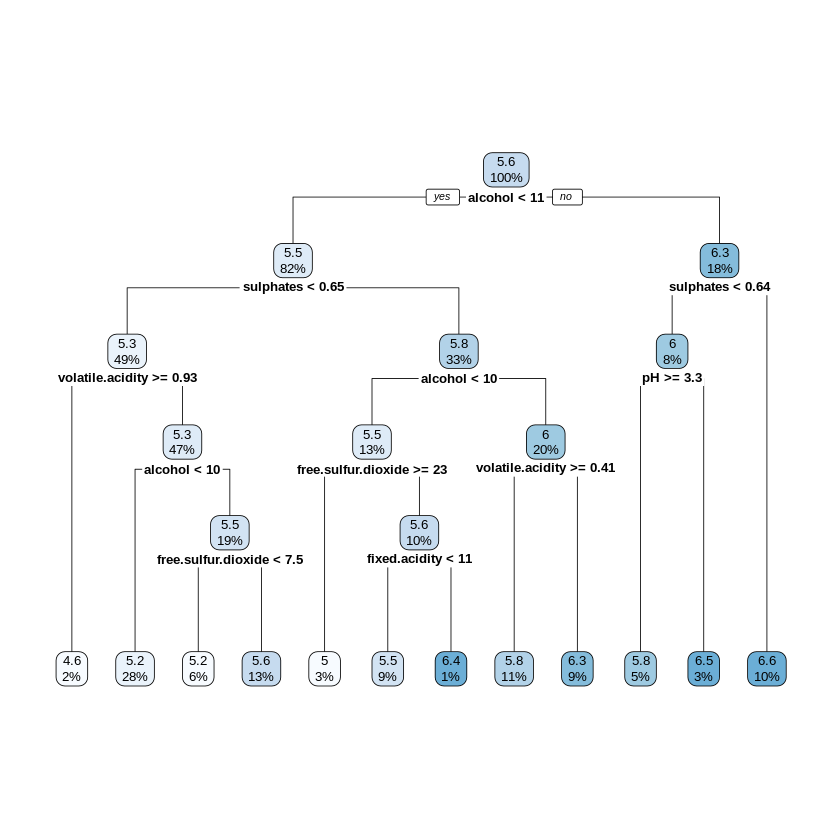

In [ ]:
wine_model <- rpart(quality ~ ., redwine_train, method="anova")
rpart.plot(wine_model)

**Question6(2)**:  (1) How many leaf nodes do we have in this tree? (2) Which feature was the most predictive of target? (3) How many features
did we end up splitting the data on?

**Answers**: (1) 12 (2) alcohol (3) 11

In [ ]:
printcp(wine_model)


Regression tree:
rpart(formula = quality ~ ., data = redwine_train, method = "anova")

Variables actually used in tree construction:
[1] alcohol             fixed.acidity       free.sulfur.dioxide
[4] pH                  sulphates           volatile.acidity   

Root node error: 832.67/1300 = 0.64052

n= 1300 

         CP nsplit rel error  xerror     xstd
1  0.167723      0   1.00000 1.00181 0.042209
2  0.074306      1   0.83228 0.87212 0.040998
3  0.033379      2   0.75797 0.82178 0.038308
4  0.022976      3   0.72459 0.78215 0.036905
5  0.020002      4   0.70162 0.77325 0.035377
6  0.016968      5   0.68161 0.75247 0.035093
7  0.015109      6   0.66465 0.73422 0.033963
8  0.014331      7   0.64954 0.73350 0.033742
9  0.013832      8   0.63521 0.72985 0.033493
10 0.012363      9   0.62137 0.72084 0.032888
11 0.011618     10   0.60901 0.71137 0.032348
12 0.010000     11   0.59739 0.70363 0.032340


**Question7**: Let’s apply our regression tree model learned on the Training data to our Test data and make some predictions. Try
the following code and take a screenshot of about half of the P1 results:

In [ ]:
p1 <- predict(wine_model, redwine_test)
p1

1301     1302     1303     1304     1305     1306     1307     1308 
6.595420 5.517857 5.517857 5.206704 5.206704 5.785714 5.206704 5.517857 
    1309     1310     1311     1312     1313     1314     1315     1316 
6.595420 5.206704 5.205128 5.206704 5.517857 6.254386 6.254386 5.205128 
    1317     1318     1319     1320     1321     1322     1323     1324 
5.205128 5.781690 5.628571 5.517857 5.517857 5.023256 5.206704 5.206704 
    1325     1326     1327     1328     1329     1330     1331     1332 
5.206704 5.517857 6.515152 5.206704 5.206704 5.206704 5.206704 6.254386 
    1333     1334     1335     1336     1337     1338     1339     1340 
6.595420 5.628571 5.628571 5.628571 5.023256 5.206704 5.206704 5.206704 
    1341     1342     1343     1344     1345     1346     1347     1348 
6.254386 6.595420 5.628571 5.517857 5.206704 5.628571 5.628571 5.517857 
    1349     1350     1351     1352     1353     1354     1355     1356 
5.206704 5.628571 5.517857 5.781690 6.595420 5.205128 6.254386 5.206704 
    1357     1358     1359     1360     1361     1362     1363     1364 
5.206704 5.206704 5.206704 5.206704 5.206704 5.517857 5.628571 5.781690 
    1365     1366     1367     1368     1369     1370     1371     1372 
5.206704 5.628571 5.023256 5.206704 5.206704 5.517857 5.206704 5.206704 
    1373     1374     1375     1376     1377     1378     1379     1380 
5.205128 5.628571 5.781690 5.517857 5.517857 6.595420 5.206704 5.206704 
    1381     1382     1383     1384     1385     1386     1387     1388 
6.254386 5.781690 6.254386 5.517857 5.785714 5.206704 5.205128 5.628571 
    1389     1390     1391     1392     1393     1394     1395     1396 
5.206704 5.628571 5.206704 6.254386 5.781690 6.254386 5.205128 5.628571 
    1397     1398     1399     1400     1401     1402     1403     1404 
5.206704 5.206704 5.206704 5.023256 5.785714 6.595420 5.781690 5.206704 
    1405     1406     1407     1408     1409     1410     1411     1412 
5.517857 6.595420 5.205128 5.628571 5.206704 5.781690 5.206704 5.781690 
    1413     1414     1415     1416     1417     1418     1419     1420 
5.206704 5.785714 5.206704 6.595420 5.517857 6.595420 5.628571 6.254386 
    1421     1422     1423     1424     1425     1426     1427     1428 
5.205128 5.785714 5.206704 6.254386 5.628571 5.206704 5.206704 5.206704 
    1429     1430     1431     1432     1433     1434     1435     1436 
5.206704 5.206704 6.595420 5.781690 6.254386 5.206704 5.781690 5.206704 
    1437     1438     1439     1440     1441     1442     1443     1444 
5.785714 5.206704 5.517857 5.517857 5.205128 5.206704 5.628571 5.023256 
    1445     1446     1447     1448     1449     1450     1451     1452 
5.206704 5.785714 5.206704 5.781690 5.206704 6.254386 5.206704 5.206704 
    1453     1454     1455     1456     1457     1458     1459     1460 
5.206704 5.628571 5.628571 5.628571 5.628571 5.628571 5.206704 5.517857 
    1461     1462     1463     1464     1465     1466     1467     1468 
5.781690 5.628571 5.785714 5.206704 6.400000 5.785714 5.628571 5.517857 
    1469     1470     1471     1472     1473     1474     1475     1476 
6.254386 5.206704 5.781690 5.628571 5.206704 5.785714 5.785714 5.781690 
    1477     1478     1479     1480     1481     1482     1483     1484 
5.206704 6.595420 5.205128 5.785714 5.517857 6.254386 5.205128 6.254386 
    1485     1486     1487     1488     1489     1490     1491     1492 
5.206704 6.254386 5.781690 5.205128 6.254386 5.628571 5.785714 6.515152 
    1493     1494     1495     1496     1497     1498     1499     1500 
5.628571 5.206704 5.517857 5.628571 5.206704 5.206704 4.551724 5.628571 
    1501     1502     1503     1504     1505     1506     1507     1508 
5.206704 5.206704 5.628571 5.206704 5.628571 5.628571 5.628571 5.206704 
    1509     1510     1511     1512     1513     1514     1515     1516 
4.551724 5.628571 5.785714 5.206704 5.781690 5.517857 6.595420 5.781690 
    1517     1518     1519     1520     1521     1522     1523

**Question8**: Compute the Mean Absolute Error (MAE) for the predictions made in Q7. Copy and paste the code below in order to create the custom function necessary to compute MAE. Then use the function to compare the actual target values in the Test data set to the predictions made in Q7.

In [ ]:
MAE <- function(actual, predicted){ mean(abs(actual-predicted)     )         }

**Question8(a)**: Can you tell from this number whether the model you have created is a good model or not? If not, explain why you cannot.

In [ ]:
MAE(redwine_test$quality, p1)

[1] 0.5447783

**Answer**: MAE number is marked as 0.54 (two decimal point) and this could be believed as a small number so it can be considered as a suitable result for Regression Trees